Подключение библиотек

In [13]:
import random
import matplotlib.pyplot as plt

функция для создания масства рандомных значений

In [14]:
def kubik(n: int) -> list:
    data = []
    while len(data) < n:
        data.append(random.randint(1, 6))
    return data

функция для подчета количества значений в массиве

In [15]:
def count_rate(kub_data: list, n: int):
    kub_rate = {}
    for i in kub_data:
        if i in kub_rate:
            continue
        else:
            kub_rate[i] = kub_data.count(i)
    for i in range(1, 7):
        if i not in kub_rate:
            kub_rate[i] = 0
    return kub_rate

функция сортировки словаря

In [16]:
def sort_rate(counted_rate: dict):
    sorted_rate = {}
    for key in sorted(counted_rate.keys()):
        sorted_rate[key] = counted_rate[key]
    return sorted_rate

функция создания датафрейма

In [17]:
import pandas as pd
def create_dataframe(sorted_date: dict):
    df = pd.DataFrame(sorted_date, index=[0])
    df = df.T
    df = df.rename(columns={0: 'Частота'})
    df.insert(0, 'Количество выпаданий', range(1, 1 + len(df)))
    return df

функция добавления в датафрейм вероятности

In [18]:
import pandas as pd
def probability_solving(dataframe: pd.DataFrame): 
    sum_rate = dataframe['Частота'].sum()
    probability = []
    for i in dataframe['Частота']:
        probability.append(i / sum_rate)
    dataframe['Вероятность'] = probability
    return dataframe

создание гистограмм

In [19]:
def create_histogram(dataframe, n):
    a = dataframe['Вероятность'].plot(kind='bar', legend=True)
    plt.title(f'Гистограмма для n = {n}')
    plt.show()

In [20]:
n_values = [100, 1000, 10000, 1000000]

   Количество выпаданий  Частота  Вероятность
1                     1       24         0.24
2                     2       11         0.11
3                     3       19         0.19
4                     4       16         0.16
5                     5       14         0.14
6                     6       16         0.16


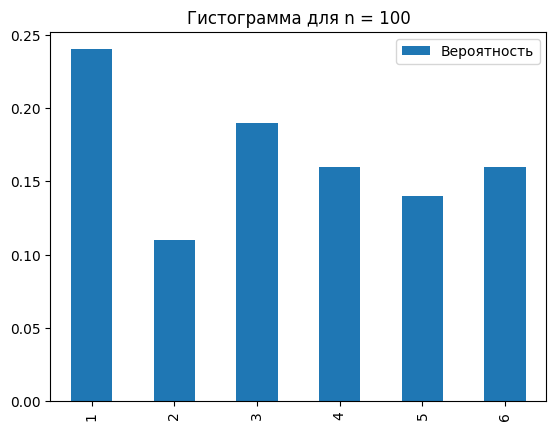

   Количество выпаданий  Частота  Вероятность
1                     1      171        0.171
2                     2      174        0.174
3                     3      167        0.167
4                     4      180        0.180
5                     5      171        0.171
6                     6      137        0.137


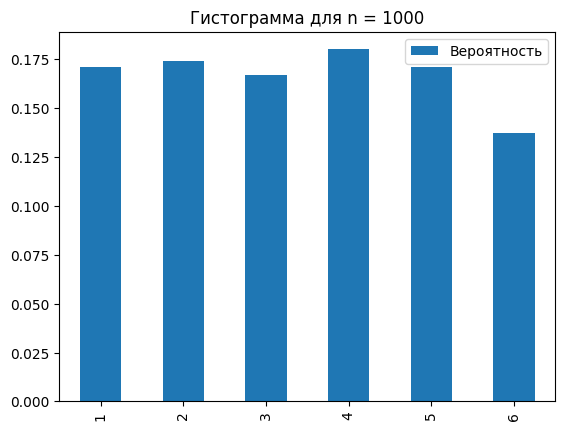

   Количество выпаданий  Частота  Вероятность
1                     1     1621       0.1621
2                     2     1672       0.1672
3                     3     1618       0.1618
4                     4     1641       0.1641
5                     5     1754       0.1754
6                     6     1694       0.1694


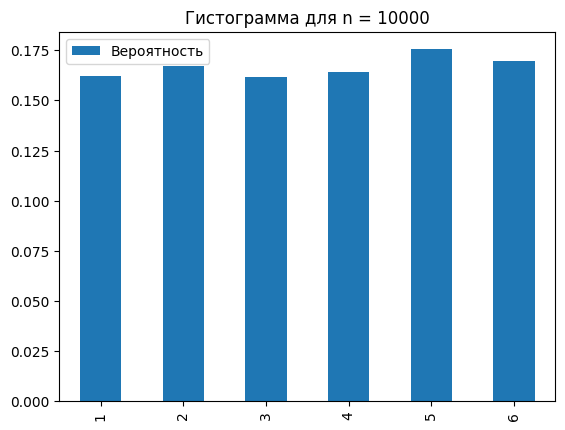

   Количество выпаданий  Частота  Вероятность
1                     1   166410     0.166410
2                     2   166657     0.166657
3                     3   166399     0.166399
4                     4   166216     0.166216
5                     5   167106     0.167106
6                     6   167212     0.167212


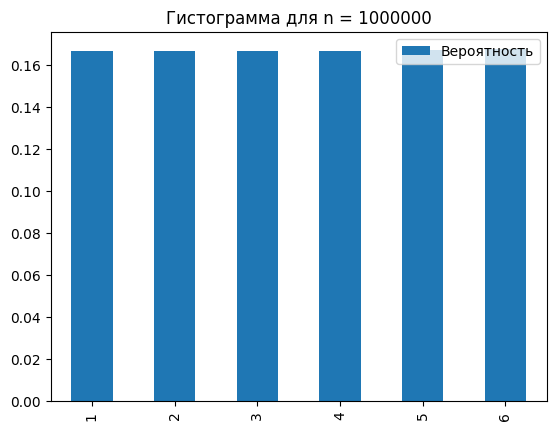

In [21]:
for n in (n_values):
    kub_data = kubik(n)
    counted_rate = count_rate(kub_data, n)
    sorted_rate = sort_rate(counted_rate)
    df = create_dataframe(sorted_rate)
    df = probability_solving(df)
    print(df)
    create_histogram(df, n)
    


<h3>Вывод</h3>
Из графиков видно, что с увеличением количества бросков вероятность выпадения каждого из чисел уравниваются и стремится к 1/6.
Опыт доказывает закон больших чисел.